In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# imports for scaling and splitting data
from sklearn.preprocessing import StandardScaler

# imports for results visualization
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Global variables

In [11]:
# file paths to mex on Colab
data_file = "sample_data/mex.csv"

               0            1            2            3            4    \
count  6313.000000  6313.000000  6313.000000  6313.000000  6313.000000   
mean     15.468399     3.618279     0.257034     0.222952     0.176640   
std       8.654782     2.349667     0.413668     0.332882     0.278354   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       8.000000     1.688750     0.025468     0.020357     0.014642   
50%      15.000000     3.473123     0.084211     0.073094     0.053225   
75%      23.000000     4.867870     0.286912     0.288080     0.213911   
max      30.000000     8.800983     5.658681     2.853849     2.891926   

               5            6            7            8            9    ...  \
count  6313.000000  6313.000000  6313.000000  6313.000000  6313.000000  ...   
mean      0.148936     0.126232     0.120530     0.110539     0.096619  ...   
std       0.249553     0.218629     0.228514     0.214237     0.188493  ...   
min       0.00000

C:\Users\sajmc\AppData\Local\Temp\ipykernel_11940\1809165834.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[0], bins=30, kde=False, rug=True)
C:\Users\sajmc\AppData\Local\Temp\ipykernel_11940\1809165834.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[873], bins=7, kde=False, r

<Axes: xlabel='873'>

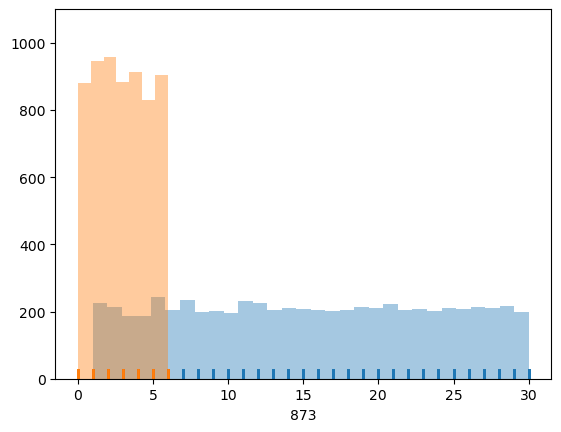

In [12]:
# read all data
data = pd.read_csv(data_file, header=None)
seed =100 #useful for random generators
print(data.describe())
sns.distplot(data[0], bins=30, kde=False, rug=True)
sns.distplot(data[873], bins=7, kde=False, rug=True)


In [13]:
# Standard scaler for data normalization
std_scaler = StandardScaler()
data.iloc[:,1:873] = std_scaler.fit_transform(data.iloc[:,1:873])
print(data.describe())


               0             1             2             3            4    \
count  6313.000000  6.313000e+03  6.313000e+03  6.313000e+03  6313.000000   
mean     15.468399 -1.800837e-17 -6.978243e-17  3.601674e-17     0.000000   
std       8.654782  1.000079e+00  1.000079e+00  1.000079e+00     1.000079   
min       1.000000 -1.540034e+00 -6.214039e-01 -6.698149e-01    -0.634639   
25%       8.000000 -8.212577e-01 -5.598327e-01 -6.086563e-01    -0.582032   
50%      15.000000 -6.178222e-02 -4.178161e-01 -4.502184e-01    -0.443410   
75%      23.000000  5.318583e-01  7.223211e-02  1.956645e-01     0.133909   
max      30.000000  2.205893e+00  1.305897e+01  7.904010e+00     9.755584   

                5             6             7             8             9    \
count  6.313000e+03  6.313000e+03  6.313000e+03  6.313000e+03  6.313000e+03   
mean  -4.502092e-18 -3.826779e-17  9.004185e-18 -6.753139e-18 -3.376569e-17   
std    1.000079e+00  1.000079e+00  1.000079e+00  1.000079e+00  1.0000

In [14]:
# shortlist if true will only run, KNN, NB and CART otherwise all models will be run
short_list = True
# a few examples of models - keras learners can also be explored
models = []
models.append(('LR', LogisticRegression(max_iter=200, solver='liblinear', multi_class='auto')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5, weights='distance')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf', gamma=0.7, C=1.0)))
models.append(('ANN', MLPClassifier(max_iter=2048, random_state=seed)))

# shortlist of models to be used KNN, NB, CART
if short_list:
    models = []
    models.append(('KNN', KNeighborsClassifier(n_neighbors=5, weights='distance')))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(kernel='rbf', gamma=0.7, C=1.0)))

In [15]:
# exercise names
target_names = ['Knee roll (Ab)', 'Bridging (Glut)', 'Pelvic tilt (Pain relief)', 'Bilateral Clam (Glut)', 'Extension in Lying (Flexibility)',
                'Prone punches (core)', 'Superman (Back)']

In [16]:
# dictionary of MEx Exercises and their corresponding indices in the data
Sensors_indices = []
Sensors_indices.append(('Wrist Accelerometer', [1, 181]))
Sensors_indices.append(('Thigh Accelerometer', [181, 361]))
Sensors_indices.append(('Pressure Mat', [361, 873]))
Sensors_indices.append(('Wrist and Thigh Accelerometer', [1, 361]))
Sensors_indices.append(('Wrist, Thigh Accelerometer and Pressure Mat', [1, 873]))
# describe the data for each sensor type as well as the combined data
for name, indices in Sensors_indices:
    print(name)
    print(data.iloc[:, indices[0]:indices[1]].describe())

Wrist Accelerometer
                1             2             3            4             5    \
count  6.313000e+03  6.313000e+03  6.313000e+03  6313.000000  6.313000e+03   
mean  -1.800837e-17 -6.978243e-17  3.601674e-17     0.000000 -4.502092e-18   
std    1.000079e+00  1.000079e+00  1.000079e+00     1.000079  1.000079e+00   
min   -1.540034e+00 -6.214039e-01 -6.698149e-01    -0.634639 -5.968558e-01   
25%   -8.212577e-01 -5.598327e-01 -6.086563e-01    -0.582032 -5.527815e-01   
50%   -6.178222e-02 -4.178161e-01 -4.502184e-01    -0.443410 -4.455895e-01   
75%    5.318583e-01  7.223211e-02  1.956645e-01     0.133909  9.797675e-02   
max    2.205893e+00  1.305897e+01  7.904010e+00     9.755584  1.113493e+01   

                6             7             8             9             10   \
count  6.313000e+03  6.313000e+03  6.313000e+03  6.313000e+03  6.313000e+03   
mean  -3.826779e-17  9.004185e-18 -6.753139e-18 -3.376569e-17  4.502092e-17   
std    1.000079e+00  1.000079e+00  1.000

# Accessing different parts of the collected data

In [17]:
# extract class labels from data
y = data.iloc[:, 873]
print(y.shape)




(6313,)


In [18]:
#extract person IDs
id = data.iloc[:, 0]
print(id.shape)


(6313,)


In [19]:
# extract features from wrist accelerometer data
acw_x = data.iloc[:, 1:181]
print(acw_x.shape)


(6313, 180)


In [20]:
# extract features from thigh accelerometer data
act_x = data.iloc[:, 181:361]
print(act_x.shape)


(6313, 180)


In [21]:
# extract features from pressure mat data
pm_x = data.iloc[:, 361:873]
print(pm_x.shape)

(6313, 512)


In [22]:
# extract wrist and thigh accelerometer data
wt_x = data.iloc[:, 1:361]
print(wt_x.shape)

(6313, 360)


In [23]:
# extract wrist, thigh and pressure mat data
wtp_x = data.iloc[:, 1:873]
print(wtp_x.shape)

(6313, 872)


# 2.1 Evaluate the role of sensors on classification

## Helper methods

In [24]:
# evaluate each model in turn
def evaluate_models_for_sensors(X, y, models):
    over_all_results = []
    all_clf_report = []
    for name, model in models:
        print (name, ' Starting...')
        # split data into train and test sets with stratification
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)
        # fit the model
        model.fit(X_train, y_train)
        # predict on test set
        y_pred = model.predict(X_test)
        # evaluate predictions
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro', labels=np.unique(y), zero_division=0)
        recall = recall_score(y_test, y_pred, average='macro', labels=np.unique(y) , zero_division=0)
        f1 = f1_score(y_test, y_pred, average='macro', labels=np.unique(y), zero_division=0)
        clf_report = classification_report(y_test, y_pred, labels=np.unique(y), target_names=target_names,
                                   output_dict=True, zero_division=0)
        # results data
        print (name, ' Successfully')
        over_all_results.append([name, accuracy, precision ,recall, f1])
        all_clf_report.append([name, clf_report])
    return over_all_results, all_clf_report

# plot overall results for accuracy, recall and f1 in bar chart
def plot_overall_results(results, title):
    # convert results to dataframe
    plot_data = pd.DataFrame(results, columns=['Model', 'Accuracy',"Precision macro average", 'Recall macro average', 'F1 macro average'])
    print(plot_data)
    # plot grouped bar chart
    plot_data.plot(x='Model', kind='bar', ylim=(0, 1.), figsize=(10, 6), legend=True, fontsize=12,
                    title=title, rot=0, grid=True, yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    )
    plt.show()
# plot classification report heatmaps
def plot_classification_report_heatmap(clf_reports, title):
    # plot classification report heatmaps
    for name, clf_report in clf_reports:
        print(name)
        sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, vmin=0, vmax=1.)
        plt.title(name + ' ' + title)
        plt.show()

## Evaluations of sensors

### Wrist accelerometer Evaluation

In [25]:
print('Running algorithms for wrist accelerometer data...')
results, clf_report = evaluate_models_for_sensors(acw_x, y, models)

Running algorithms for wrist accelerometer data...
KNN  Starting...


KNN  Successfully
NB  Starting...
NB  Successfully
SVM  Starting...
SVM  Successfully


  Model  Accuracy  Precision macro average  Recall macro average  \
0   KNN  0.772763                 0.781424              0.772850   
1    NB  0.403009                 0.464887              0.409970   
2   SVM  0.552652                 0.602543              0.546015   

   F1 macro average  
0          0.774106  
1          0.375596  
2          0.525020  


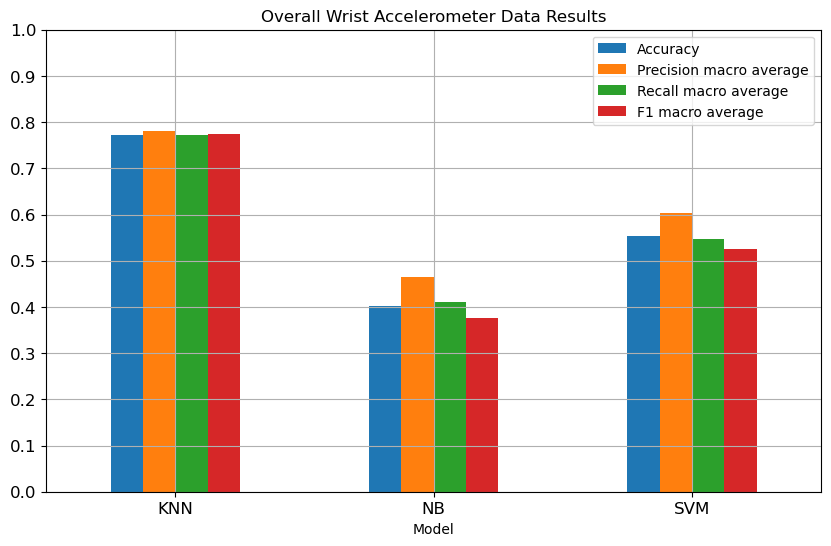

KNN


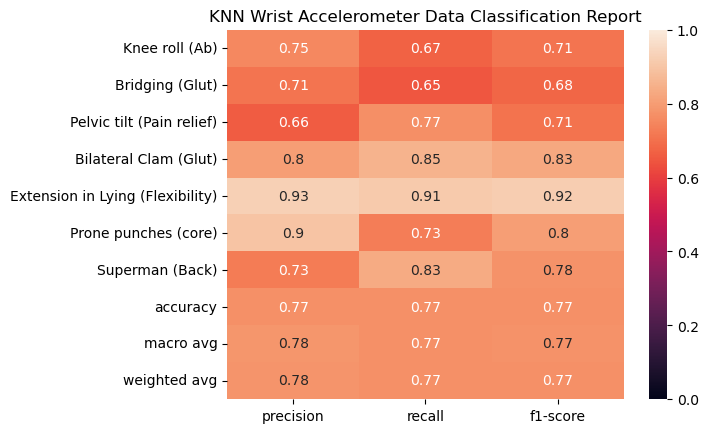

NB


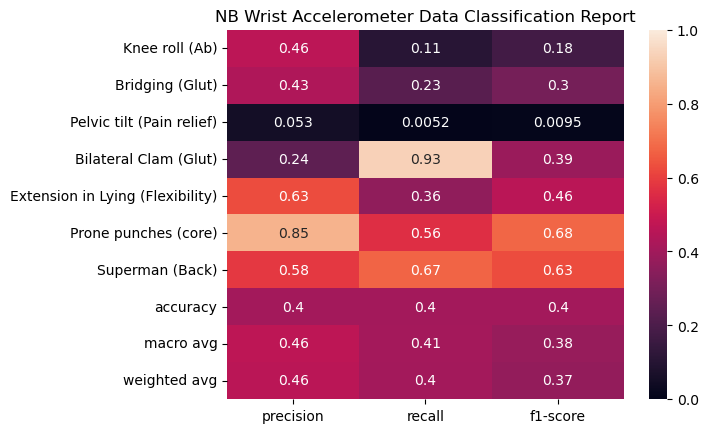

SVM


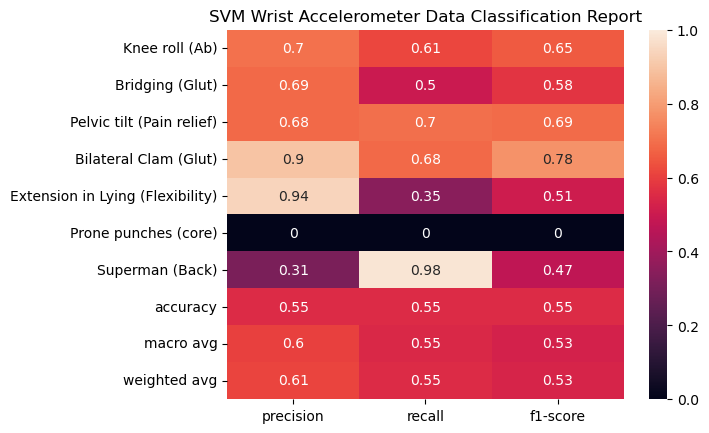

In [26]:
plot_overall_results(results, 'Overall Wrist Accelerometer Data Results')
plot_classification_report_heatmap(clf_report, 'Wrist Accelerometer Data Classification Report')

### Thigh accelerometer evaluation

In [27]:
print('Running algorithms for thigh accelerometer data...')
# complete code here
results, clf_report = evaluate_models_for_sensors(act_x, y, models)


Running algorithms for thigh accelerometer data...
KNN  Starting...
KNN  Successfully
NB  Starting...
NB  Successfully
SVM  Starting...
SVM  Successfully


  Model  Accuracy  Precision macro average  Recall macro average  \
0   KNN  0.849565                 0.863021              0.850575   
1    NB  0.631037                 0.711743              0.629198   
2   SVM  0.250198                 0.413778              0.242398   

   F1 macro average  
0          0.851741  
1          0.630368  
2          0.199040  


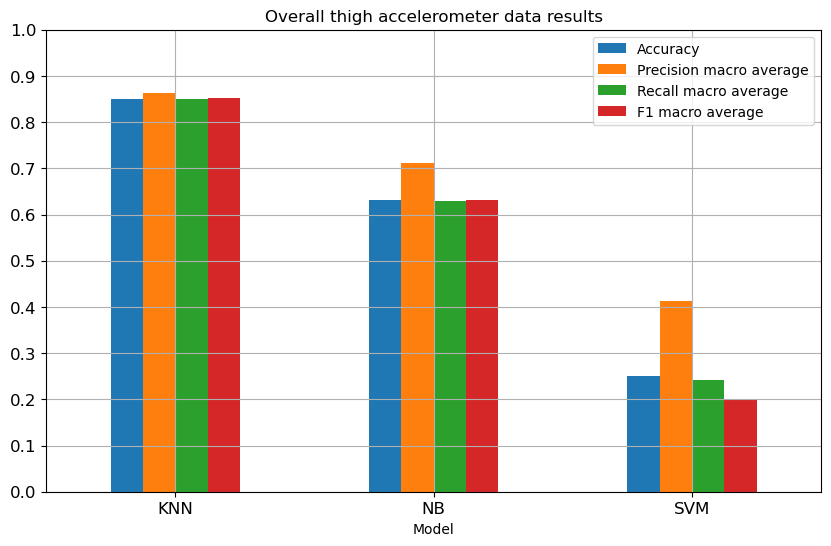

KNN


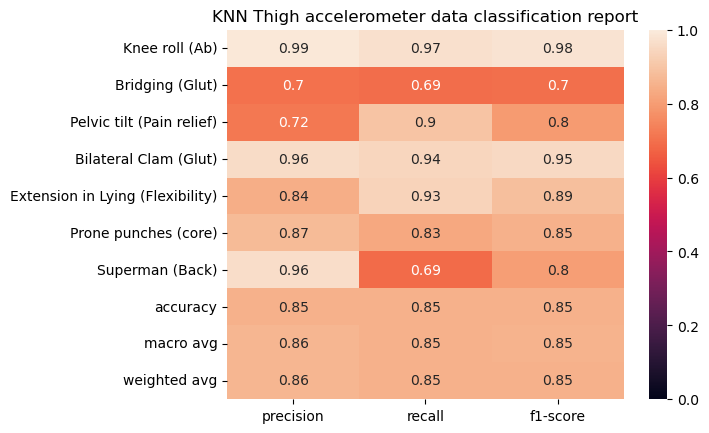

NB


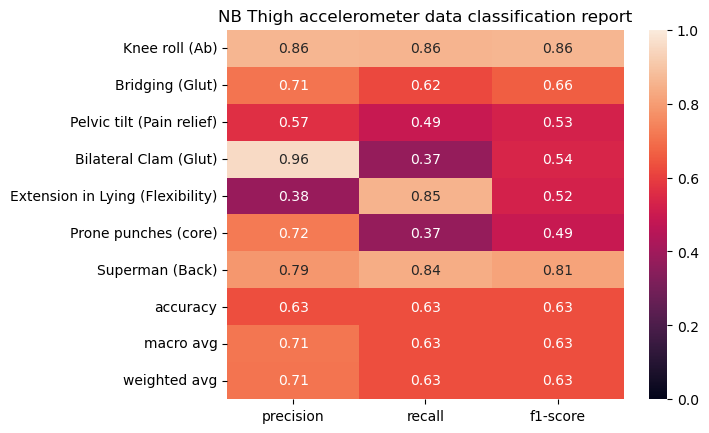

SVM


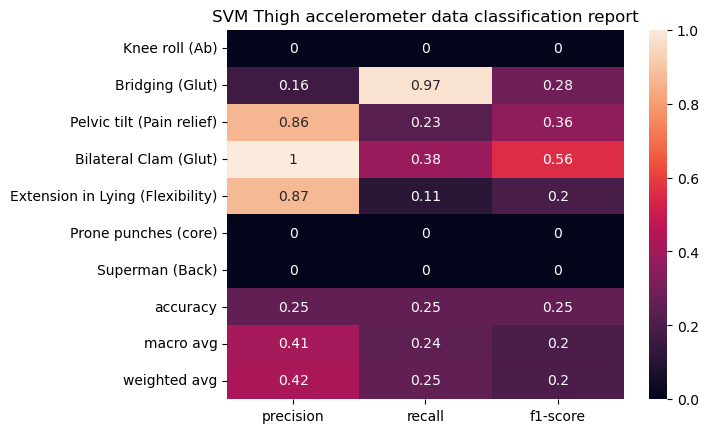

In [28]:
plot_overall_results(results, 'Overall thigh accelerometer data results')
plot_classification_report_heatmap(clf_report, 'Thigh accelerometer data classification report')

### Pressure mat data evaluation

In [29]:
print('Running algorithms for pressure mat data...')
# complete code here
results, clf_report = evaluate_models_for_sensors(pm_x, y, models)

Running algorithms for pressure mat data...
KNN  Starting...
KNN  Successfully
NB  Starting...
NB  Successfully
SVM  Starting...
SVM  Successfully


  Model  Accuracy  Precision macro average  Recall macro average  \
0   KNN  0.982581                 0.982028              0.982067   
1    NB  0.790182                 0.838911              0.791950   
2   SVM  0.559778                 0.870016              0.559557   

   F1 macro average  
0          0.982035  
1          0.782359  
2          0.609722  


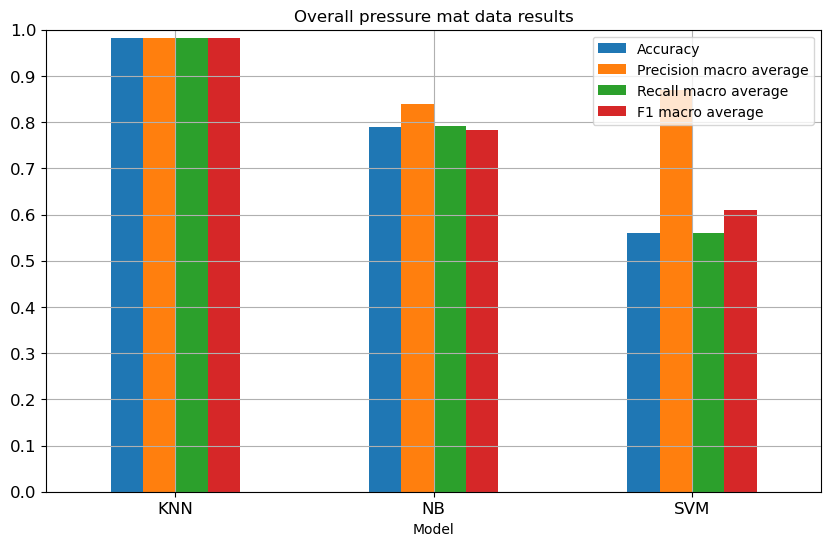

KNN


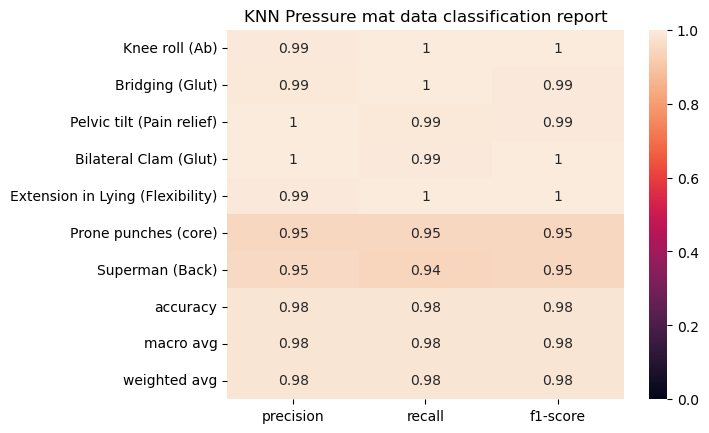

NB


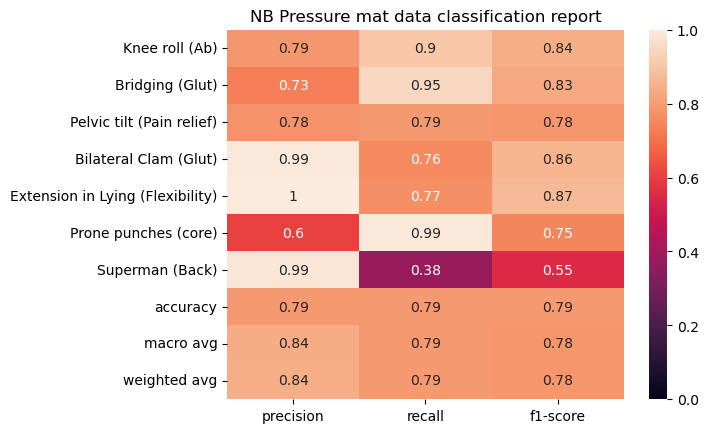

SVM


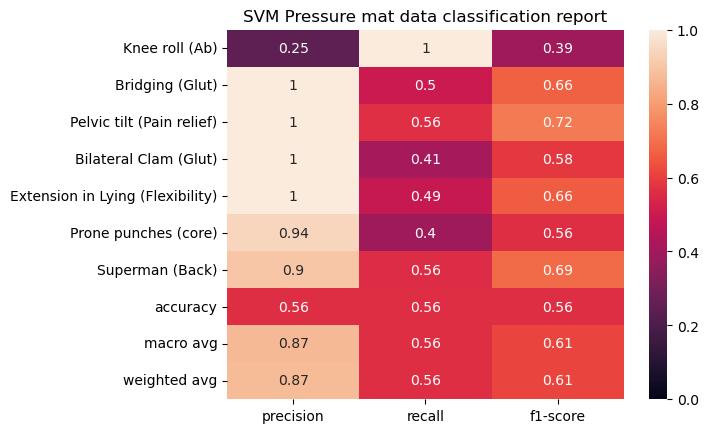

In [30]:
plot_overall_results(results, 'Overall pressure mat data results')
plot_classification_report_heatmap(clf_report, 'Pressure mat data classification report')

### Wrist and thigh accelerometer data evaluation

In [31]:
print('Running algorithms for wrist and thigh accelerometer data...')
# complete code here
results, clf_report = evaluate_models_for_sensors(wt_x, y, models)

Running algorithms for wrist and thigh accelerometer data...
KNN  Starting...
KNN  Successfully
NB  Starting...
NB  Successfully
SVM  Starting...
SVM  Successfully


  Model  Accuracy  Precision macro average  Recall macro average  \
0   KNN  0.928741                 0.935270              0.930515   
1    NB  0.763262                 0.803360              0.764619   
2   SVM  0.194774                 0.308401              0.186419   

   F1 macro average  
0          0.929741  
1          0.770548  
2          0.106555  


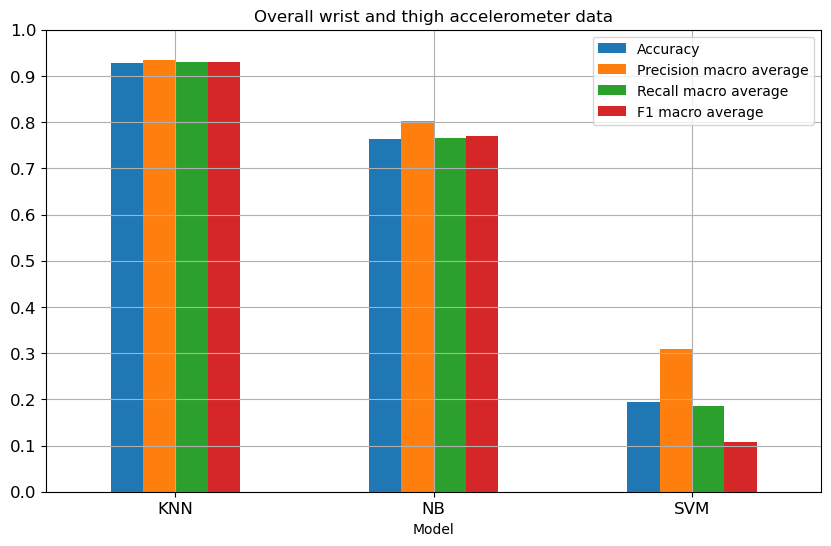

KNN


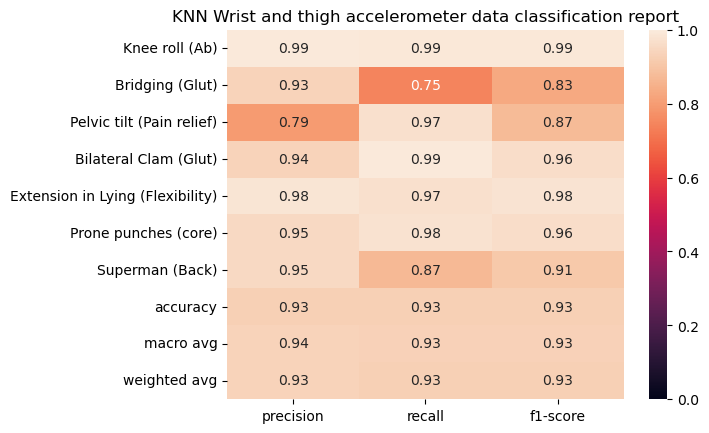

NB


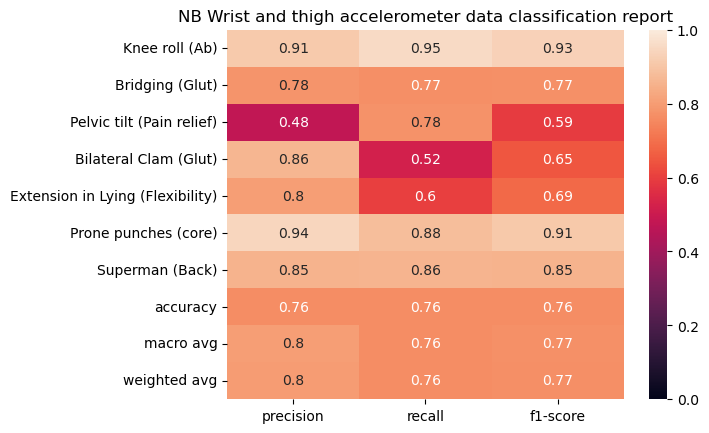

SVM


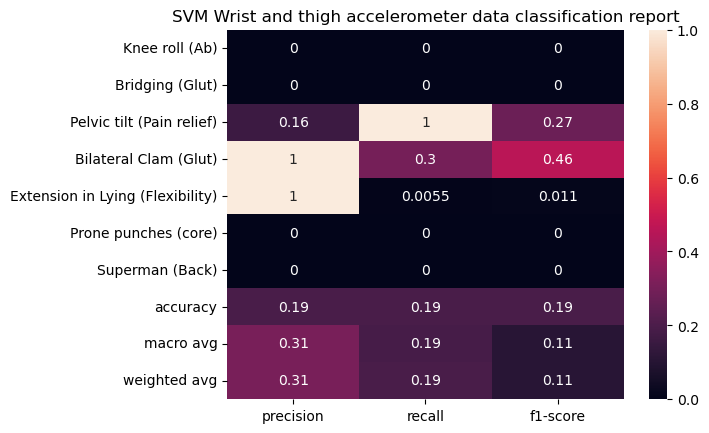

In [32]:
plot_overall_results(results, 'Overall wrist and thigh accelerometer data')
plot_classification_report_heatmap(clf_report, 'Wrist and thigh accelerometer data classification report')

### Wrist and thigh accelerometer data and pressure mat data evaluation

In [33]:
print('Running algorithms for wrist and thigh accelerometer data and pressure mat data...')
# complete code here
results, clf_report = evaluate_models_for_sensors(wtp_x, y, models)

Running algorithms for wrist and thigh accelerometer data and pressure mat data...
KNN  Starting...
KNN  Successfully
NB  Starting...
NB  Successfully
SVM  Starting...
SVM  Successfully


  Model  Accuracy  Precision macro average  Recall macro average  \
0   KNN  0.985748                 0.985717              0.985770   
1    NB  0.896279                 0.907898              0.897517   
2   SVM  0.156770                 0.164678              0.147700   

   F1 macro average  
0          0.985722  
1          0.897893  
2          0.047226  


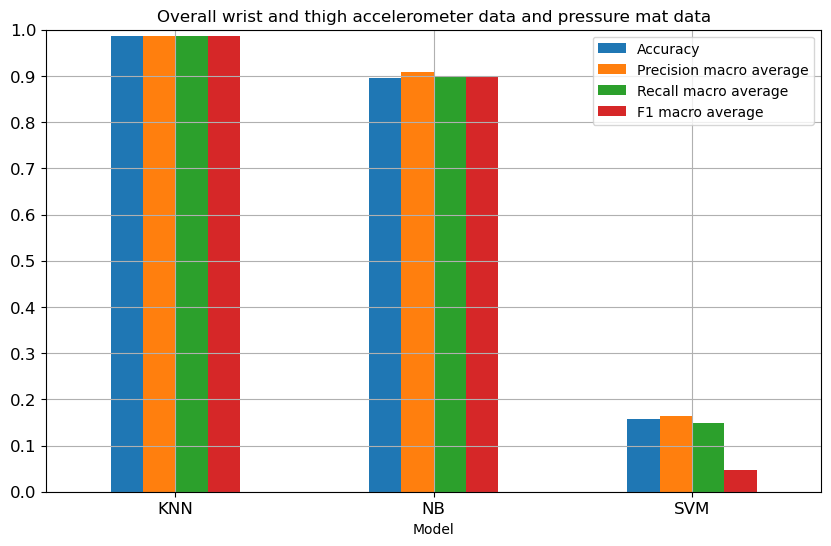

KNN


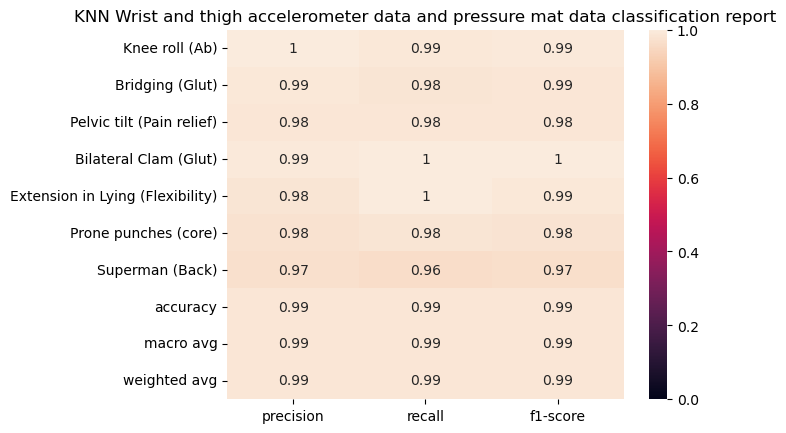

NB


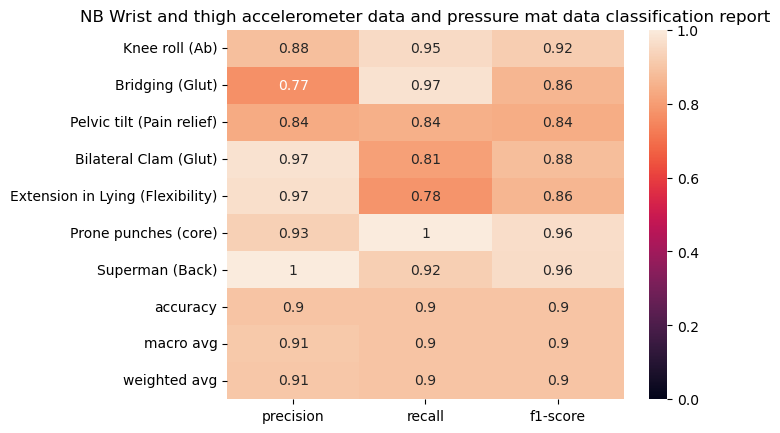

SVM


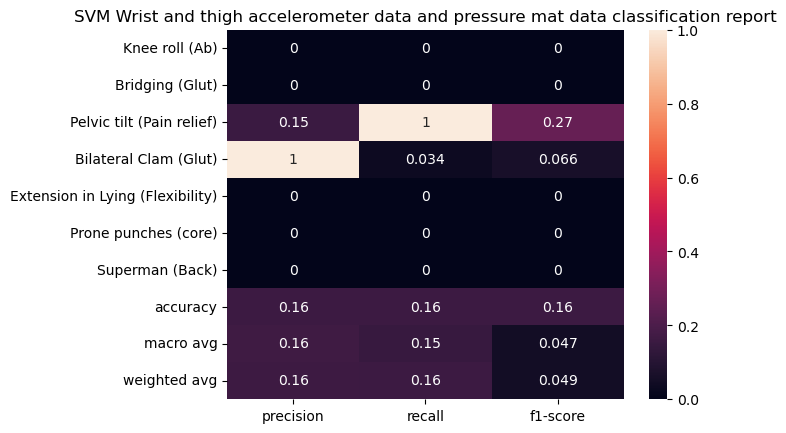

In [34]:
plot_overall_results(results, 'Overall wrist and thigh accelerometer data and pressure mat data')
plot_classification_report_heatmap(clf_report, 'Wrist and thigh accelerometer data and pressure mat data classification report')

# 2.2 Evaluate the role of persons data on classification

In [35]:
#print all unique person Ids
data[0].unique()

array([30, 22, 24, 25, 26,  1,  6,  7,  4, 23,  8,  9, 28, 29,  2,  3, 27,
       20, 21, 11, 10, 13, 12, 15, 14, 17, 16, 19, 18,  5], dtype=int64)

## Helper methods

In [36]:

#helper function to split data by Leave-One-Person-Out
def lopo_split(df, indices=[], test_person=None):
    if test_person == None:
        print("Need test person id")
        return
    if len(indices) == 0 | len(indices)>2 | indices[0]<1 | indices[1]>872 | indices[0]>indices[1]:
        print("Need valid indices")
        return

    train_df = df[df[0]!=test_person]
    test_df = df[df[0]==test_person]

    X_train = train_df.iloc[:, indices[0]:indices[1]].to_numpy()
    X_test = test_df.iloc[:, indices[0]:indices[1]].to_numpy()                     
    y_train = train_df.iloc[:, 873].to_numpy()
    y_test = test_df.iloc[:, 873].to_numpy()

    return X_train, X_test, y_train, y_test

def evaluate_models_for_persons_data(data, models, indices):
    print("Running algorithms for Leave-One-Person-Out on ", indices[0] ," data...")
    models_results = []
    # evaluate each model in turn
    for name, model in models:
        print (name, ' Starting...')
        # split data into train and test sets
        for person_id in np.unique(id):
            print("Testing for person id: ", person_id)
            # split data into train and test sets
            X_train, X_test, y_train, y_test = lopo_split(data, indices[1], test_person=person_id)
            # fit the model
            model.fit(X_train, y_train)
            # predict on test set
            y_pred = model.predict(X_test)
            # evaluate predictions
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='macro', labels=np.unique(y), zero_division=0)
            recall = recall_score(y_test, y_pred, average='macro', labels=np.unique(y), zero_division=0)
            f1 = f1_score(y_test, y_pred, average='macro', labels=np.unique(y), zero_division=0)
            
        # results data
        print (name, ' Successfully')
        # get average results for all leave-one-person-out iterations for each model
        models_results.append([name, np.mean(accuracy), np.mean(precision) ,np.mean(recall), np.mean(f1)])
    return models_results

# plot overall results for mean accuracy, recall and f1 in bar chart for Leave-One-Person-Out
def plot_overall_results(results, title):
    # convert results to dataframe
    plot_data = pd.DataFrame(results, columns=['Model', 'Mean Accuracy',"Mean Precision macro average", 'Mean Recall macro average', 'Mean F1 macro average'])
    print(plot_data)
    # plot grouped bar chart
    plot_data.plot(x='Model', kind='bar', ylim=(0, 1.), figsize=(10, 6), legend=True, fontsize=12,
                    title=title, rot=0, grid=True, yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    )
    plt.show()


In [37]:
#testing helper method
#indicies indicate the sensor or sensors needed
X_train, X_test, y_train, y_test = lopo_split(data, indices=[1, 181], test_person=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6087, 180)
(226, 180)
(6087,)
(226,)


## Evaluate the role of persons

### Wrist accelerometer data

In [38]:
print('Running algorithms for wrist accelerometer data...')
# complete code here
wa_lopo_results = evaluate_models_for_persons_data(data, models, Sensors_indices[0])

Running algorithms for wrist accelerometer data...
Running algorithms for Leave-One-Person-Out on  Wrist Accelerometer  data...
KNN  Starting...
Testing for person id:  1
Testing for person id:  2
Testing for person id:  3
Testing for person id:  4
Testing for person id:  5
Testing for person id:  6
Testing for person id:  7
Testing for person id:  8
Testing for person id:  9
Testing for person id:  10
Testing for person id:  11
Testing for person id:  12
Testing for person id:  13
Testing for person id:  14
Testing for person id:  15
Testing for person id:  16
Testing for person id:  17
Testing for person id:  18
Testing for person id:  19
Testing for person id:  20
Testing for person id:  21
Testing for person id:  22
Testing for person id:  23
Testing for person id:  24
Testing for person id:  25
Testing for person id:  26
Testing for person id:  27
Testing for person id:  28
Testing for person id:  29
Testing for person id:  30
KNN  Successfully
NB  Starting...
Testing for person i

  Model  Mean Accuracy  Mean Precision macro average  \
0   KNN       0.641414                      0.624778   
1    NB       0.520202                      0.492961   
2   SVM       0.343434                      0.186983   

   Mean Recall macro average  Mean F1 macro average  
0                   0.639720               0.605629  
1                   0.522474               0.479541  
2                   0.338494               0.228122  


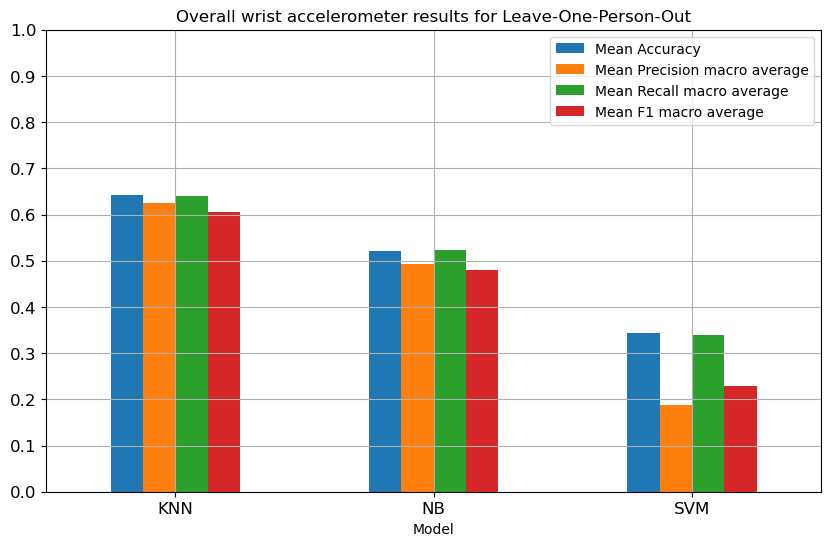

In [39]:
plot_overall_results(wa_lopo_results, 'Overall wrist accelerometer results for Leave-One-Person-Out')

### Thigh accelerometer data

In [40]:
print('Running algorithms for thigh accelerometer data...')

# complete code here
ta_lopo_results = evaluate_models_for_persons_data(data, models, Sensors_indices[1])

Running algorithms for thigh accelerometer data...
Running algorithms for Leave-One-Person-Out on  Thigh Accelerometer  data...
KNN  Starting...
Testing for person id:  1
Testing for person id:  2
Testing for person id:  3
Testing for person id:  4
Testing for person id:  5
Testing for person id:  6
Testing for person id:  7
Testing for person id:  8
Testing for person id:  9
Testing for person id:  10
Testing for person id:  11
Testing for person id:  12
Testing for person id:  13
Testing for person id:  14
Testing for person id:  15
Testing for person id:  16
Testing for person id:  17
Testing for person id:  18
Testing for person id:  19
Testing for person id:  20
Testing for person id:  21
Testing for person id:  22
Testing for person id:  23
Testing for person id:  24
Testing for person id:  25
Testing for person id:  26
Testing for person id:  27
Testing for person id:  28
Testing for person id:  29
Testing for person id:  30
KNN  Successfully
NB  Starting...
Testing for person i

  Model  Mean Accuracy  Mean Precision macro average  \
0   KNN       0.696970                      0.734910   
1    NB       0.651515                      0.619008   
2   SVM       0.146465                      0.020924   

   Mean Recall macro average  Mean F1 macro average  
0                   0.698467               0.643539  
1                   0.639907               0.599416  
2                   0.142857               0.036501  


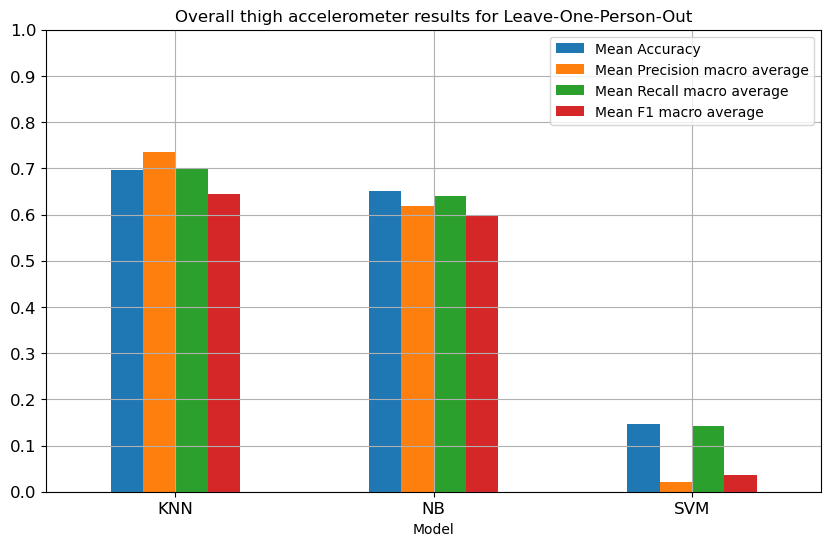

In [41]:
plot_overall_results(ta_lopo_results, 'Overall thigh accelerometer results for Leave-One-Person-Out')

### Pressure mat data

In [42]:
print('Running algorithms for pressure mat data...')

# complete code here
pm_lopo_results = evaluate_models_for_persons_data(data, models, Sensors_indices[2])

Running algorithms for pressure mat data...
Running algorithms for Leave-One-Person-Out on  Pressure Mat  data...
KNN  Starting...
Testing for person id:  1
Testing for person id:  2
Testing for person id:  3
Testing for person id:  4
Testing for person id:  5
Testing for person id:  6
Testing for person id:  7
Testing for person id:  8
Testing for person id:  9
Testing for person id:  10
Testing for person id:  11
Testing for person id:  12
Testing for person id:  13
Testing for person id:  14
Testing for person id:  15
Testing for person id:  16
Testing for person id:  17
Testing for person id:  18
Testing for person id:  19
Testing for person id:  20
Testing for person id:  21
Testing for person id:  22
Testing for person id:  23
Testing for person id:  24
Testing for person id:  25
Testing for person id:  26
Testing for person id:  27
Testing for person id:  28
Testing for person id:  29
Testing for person id:  30
KNN  Successfully
NB  Starting...
Testing for person id:  1
Testing 

  Model  Mean Accuracy  Mean Precision macro average  \
0   KNN       0.505051                      0.404470   
1    NB       0.500000                      0.439322   
2   SVM       0.277778                      0.166249   

   Mean Recall macro average  Mean F1 macro average  
0                   0.505386               0.420884  
1                   0.512673               0.432053  
2                   0.275862               0.177956  


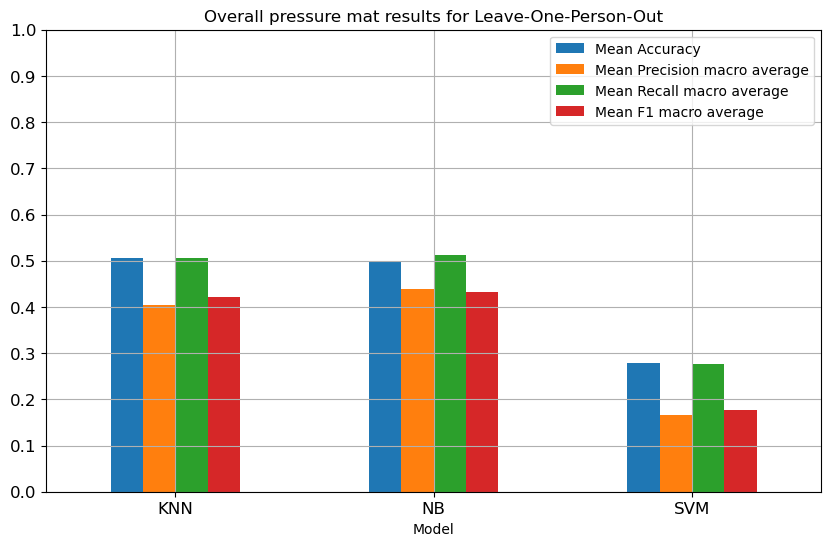

In [43]:
plot_overall_results(pm_lopo_results, 'Overall pressure mat results for Leave-One-Person-Out')

### Wrist and thigh accelerometer data evaluation

In [44]:
print('Running algorithms for wrist and thigh accelerometer data...')

# complete code here
wt_lopo_results = evaluate_models_for_persons_data(data, models, Sensors_indices[3])

Running algorithms for wrist and thigh accelerometer data...
Running algorithms for Leave-One-Person-Out on  Wrist and Thigh Accelerometer  data...
KNN  Starting...
Testing for person id:  1
Testing for person id:  2
Testing for person id:  3
Testing for person id:  4
Testing for person id:  5
Testing for person id:  6
Testing for person id:  7
Testing for person id:  8
Testing for person id:  9
Testing for person id:  10
Testing for person id:  11
Testing for person id:  12
Testing for person id:  13
Testing for person id:  14
Testing for person id:  15
Testing for person id:  16
Testing for person id:  17
Testing for person id:  18
Testing for person id:  19
Testing for person id:  20
Testing for person id:  21
Testing for person id:  22
Testing for person id:  23
Testing for person id:  24
Testing for person id:  25
Testing for person id:  26
Testing for person id:  27
Testing for person id:  28
Testing for person id:  29
Testing for person id:  30
KNN  Successfully
NB  Starting...


  Model  Mean Accuracy  Mean Precision macro average  \
0   KNN       0.939394                      0.946042   
1    NB       0.803030                      0.821314   
2   SVM       0.141414                      0.020202   

   Mean Recall macro average  Mean F1 macro average  
0                   0.941041               0.939538  
1                   0.803534               0.796639  
2                   0.142857               0.035398  


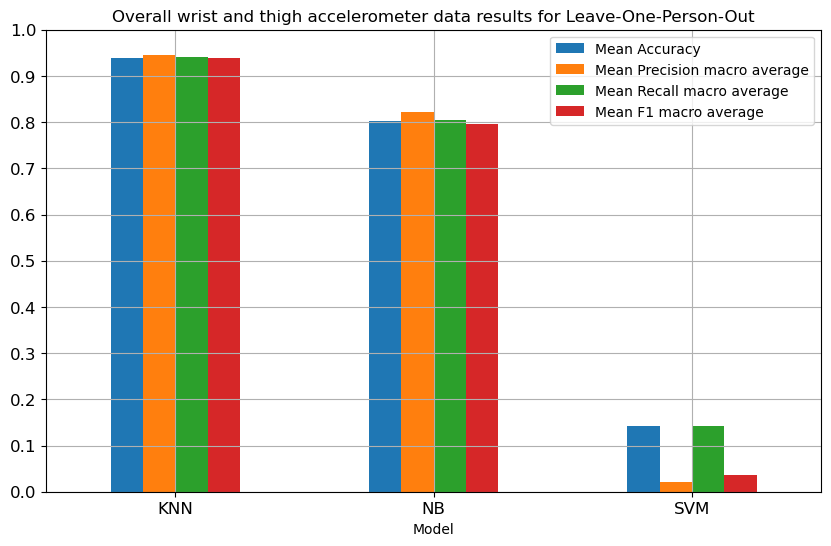

In [45]:
plot_overall_results(wt_lopo_results, 'Overall wrist and thigh accelerometer data results for Leave-One-Person-Out')

### Wrist and thigh accelerometer data and pressure mat data evaluation

In [46]:
print('Running algorithms for wrist, thigh accelerometer and pressure mat data...')

# complete code here
wtp_lopo_results = evaluate_models_for_persons_data(data, models, Sensors_indices[4])

Running algorithms for wrist, thigh accelerometer and pressure mat data...
Running algorithms for Leave-One-Person-Out on  Wrist, Thigh Accelerometer and Pressure Mat  data...
KNN  Starting...
Testing for person id:  1
Testing for person id:  2
Testing for person id:  3
Testing for person id:  4
Testing for person id:  5
Testing for person id:  6
Testing for person id:  7
Testing for person id:  8
Testing for person id:  9
Testing for person id:  10
Testing for person id:  11
Testing for person id:  12
Testing for person id:  13
Testing for person id:  14
Testing for person id:  15
Testing for person id:  16
Testing for person id:  17
Testing for person id:  18
Testing for person id:  19
Testing for person id:  20
Testing for person id:  21
Testing for person id:  22
Testing for person id:  23
Testing for person id:  24
Testing for person id:  25
Testing for person id:  26
Testing for person id:  27
Testing for person id:  28
Testing for person id:  29
Testing for person id:  30
KNN  S

  Model  Mean Accuracy  Mean Precision macro average  \
0   KNN       0.878788                      0.894125   
1    NB       0.742424                      0.720984   
2   SVM       0.141414                      0.020202   

   Mean Recall macro average  Mean F1 macro average  
0                   0.877100               0.878488  
1                   0.752584               0.704162  
2                   0.142857               0.035398  


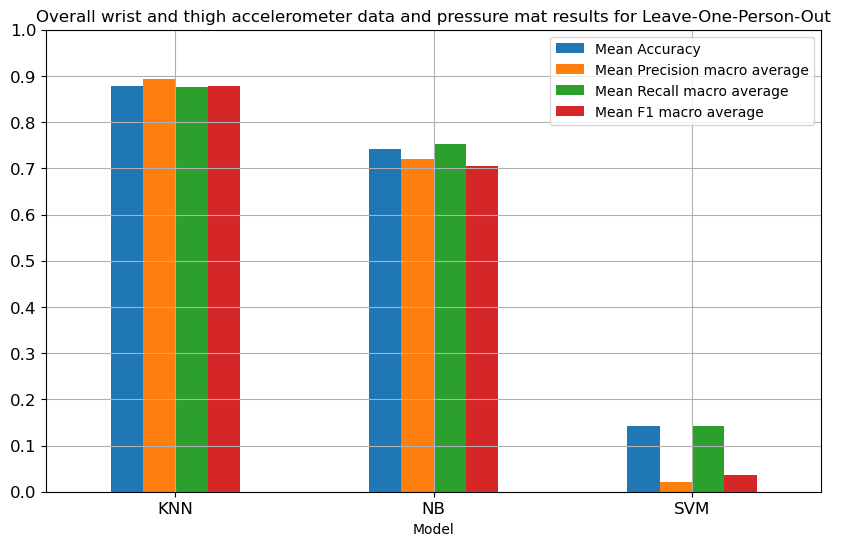

In [47]:
plot_overall_results(wtp_lopo_results, 'Overall wrist and thigh accelerometer data and pressure mat results for Leave-One-Person-Out')